# Fundamentals of Data Analysis Winter 2023 Tasks

**Author: Nur Bujang**

tasks.ipynb
***

## Task 1 : Collatz Conjecture
> The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer x and  repeatedly apply the function f ( x ) below, you al ways get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .

\begin{align*}
f(x) = \begin{cases} 
    x \div 2 & \text{if } x \text{ is even} \\
    3x + 1 & \text{if } x \text{ is odd}
\end{cases}
\end{align*}

> For example, starting with the value 10, which is an even number, we divide it by 2 to get 5. Then 5 is an odd number so, we multiply by 3 and add 1 to get 16. Then we repeatedly divide by 2 to get 8, 4, 2, 1. **Once we are at 1, we go back to 4 and get stuck in the repeating sequence 4, 2, 1 as we suspected.**

### Task Description:
> The task is to verify, using Python, that the Collatz conjecture is true for the first 10000 positive integers.


In [11]:
def collatz(x):
    
    clist = [x] # numbers will be in a list

    while x != 1:
        if x % 2 == 0:
            x = x // 2 # If x is even, divide it by two
        else:
            x = (3 * x) + 1 # if x is odd, multiply by 3, then add 1
        clist.append(x) # list will append

    return clist

In [12]:
# for verification of the first 10000 positive integers

def verify_collatz(limit):
    for i in range(1, limit + 1):
        clist = collatz(i)

# if NOT verified, output will NOT end with 1
    if clist[-1:] != [1]: # slicing and comparing
        print(f"The Collatz Conjecture is not true for x = {i}")
        return
    else:
        print("The Collatz Conjecture is true the first", limit, "positive integers.")

verify_collatz(10000) # call the function 

The Collatz Conjecture is true the first 10000 positive integers.


## Task 2 : Penguins Data Set Variables
> Give an overview of the famous penguins data set and explain the types of variables it contains. 

### Task Description: 
> The task is to suggest the types of variables that should be used to model them in Python and to explain your rationale.

In [13]:
import numpy as np # for computational operations
import pandas as pd # for data loading from other sources and processing

In [14]:
df = pd.read_csv('penguins.csv') # import penguins.csv
df.head() # show the default first few lines of the dataframe

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


df.dtypes will provide the data type of each column. 

df.info() will give an output containing the number of rows and columns, column names and their data types and the number of non-null (not missing) values of each column. 

In [15]:
data_types = df.dtypes # OR df.info()
print(data_types)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


From the output, the first (species), second (island) and seventh (sex) columns are objects. These objects are strings. String is a more specialized text data type compared to the generic object data type. Strings are not categorical data type but they can be made into categories. In this instance, it is a categorical data type, which is a type of qualitative data, meaning it can only fall into a select group. The three species are Adelie, Chinstrap, and Gentoo. The three islands are Torgersen, Dream, and Biscoe. The sex are either "Male" or "Female". Hence, the species, island and sex are nominal types of categorical data which has no order or ranking. 

The third (bill length), fourth (bill depth), fifth (flipper length) and sixth (body mass) columns are 64-bit floating-point numbers. It is a continuous data type, which is a type of quantitative data. These penguin body part measurements and weight can take an infinite value within a certain range. These are measured in ratio scale, which has equal intervals between values and has a true zero point.

In [16]:
columns_to_check = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for column_name in columns_to_check:
    element = df.at[0, column_name] # row 0
    if isinstance(element, int):
        print(f"{column_name} column is an int.")
    else:
        print(f"{column_name} column is not an int.")

bill_length_mm column is not an int.
bill_depth_mm column is not an int.
flipper_length_mm column is not an int.
body_mass_g column is not an int.


However, the penguins.csv file shows that the flipper length and body mass are int values. Why do they output as floats?

To check if the numeric columns contain int values and the object columns contain string values:

In [17]:
numeric_columns = [] 
string_columns = []

for c in df.columns:
    if ('mm' in c) or ('g' in c): #  if there is mm or g in the column name, add to a numeric list
        numeric_columns.append(c) 
    else: 
        string_columns.append(c) # if not, put it in another list

print(string_columns)
print(numeric_columns)

['species', 'island', 'sex']
['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [18]:
for s in string_columns:
    print(s, df[s].astype('category').cat.categories) # print categories in string columns

for n in numeric_columns:
    try:
        df[n].astype(int) # run a code that might cause exceptions
    except:
        print(f'column {n} cannot be converted to int.') # run this code when there is an exception
        print(f'does {n} have a null value?', df[n].isna().any()) # does this column contain a missing value?
    else:
        print(f'column {n} can be converted to int') # run this code if there are no exceptions


species Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object')
island Index(['Biscoe', 'Dream', 'Torgersen'], dtype='object')
sex Index(['FEMALE', 'MALE'], dtype='object')
column bill_length_mm cannot be converted to int.
does bill_length_mm have a null value? True
column bill_depth_mm cannot be converted to int.
does bill_depth_mm have a null value? True
column flipper_length_mm cannot be converted to int.
does flipper_length_mm have a null value? True
column body_mass_g cannot be converted to int.
does body_mass_g have a null value? True


Null values cannot be converted to integer. Hence, the reason why the columns flipper length and body mass are considered as floats.

The rationale for selecting variable types for modeling depends on the question and types of analysis we want to perform. For example, we can use all the quantitative data to predict species classification and in regression analysis, where we can predict one variable from other features. Different variable types will also determine the appropriate type of data visualization techniques, such as pie charts, scatter plots and histograms. Understanding and specifying data types is important for the right analysis and to ensure that the operations are performed correctly.

## **Task 3 : Penguins Data Set Distribution Model** 
> For each of the variables in the penguins data set:

### Task Description:
> The task is to suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

We use data visualization and hypothesis testing to validate the distribution for each variable.

In [21]:
import numpy as np # for computational operations, generating data samples
import pandas as pd # for data loading from other sources and processing
import matplotlib.pyplot as plt # for data plotting and distribution fitting
import seaborn as sns # for data plotting and distribution fitting
from distfit import distfit # for probability density fitting and hypothesis testing

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv') # import penguins.csv from Waskom (2022)
# df.head() # to show the default first few lines of the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Columns species, island and sex are nominal categorical variables, so no probability distributions are applicable.

Probability distributions only apply on numerical columns bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_g.

##### FOR COLUMN bill_length_mm:

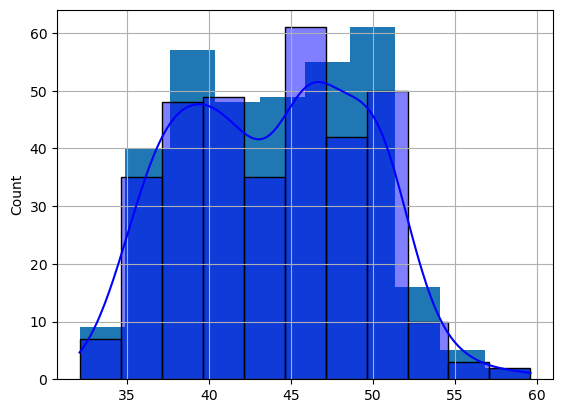

In [25]:
df['bill_length_mm'].hist() 

# Output: looks like a bimodal distribution

# OR

temp_array = df['temp'].values
# print(bill_length_mm_array)

# Create a histogram and plot the fitted normal distribution
sns.histplot(bill_length_mm_array, kde=True, color='blue', label='Data')
plt.show()

# Output: looks like a bimodal distribution (two distinct peaks in the histogram)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00220202] [loc=43.922 scale=5.452]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0100282] [loc=32.100 scale=11.822]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0100282] [loc=-8589934559.900 scale=8589934592.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.00132702] [loc=43.893 scale=5.259]
[distfit] >INFO> [t         ] [0.21 sec] [RSS: 0.00220229] [loc=43.921 scale=5.451]
[distfit] >INFO> [genextreme] [0.05 sec] [RSS: 0.00205494] [loc=41.920 scale=5.322]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.00222517] [loc=-134.165 scale=0.167]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00225104] [loc=-93.617 scale=137.431]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 0.0015516] [loc=31.428 scale=29.718]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0063868] [loc=32.100 scale=27.500]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.00217299] [loc=-1297.278 scale=189.238]


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ndweibull(c=1.71516, loc=43.8925, scale=5.25861)'}, xlabel='Values', ylabel='Frequency'>)

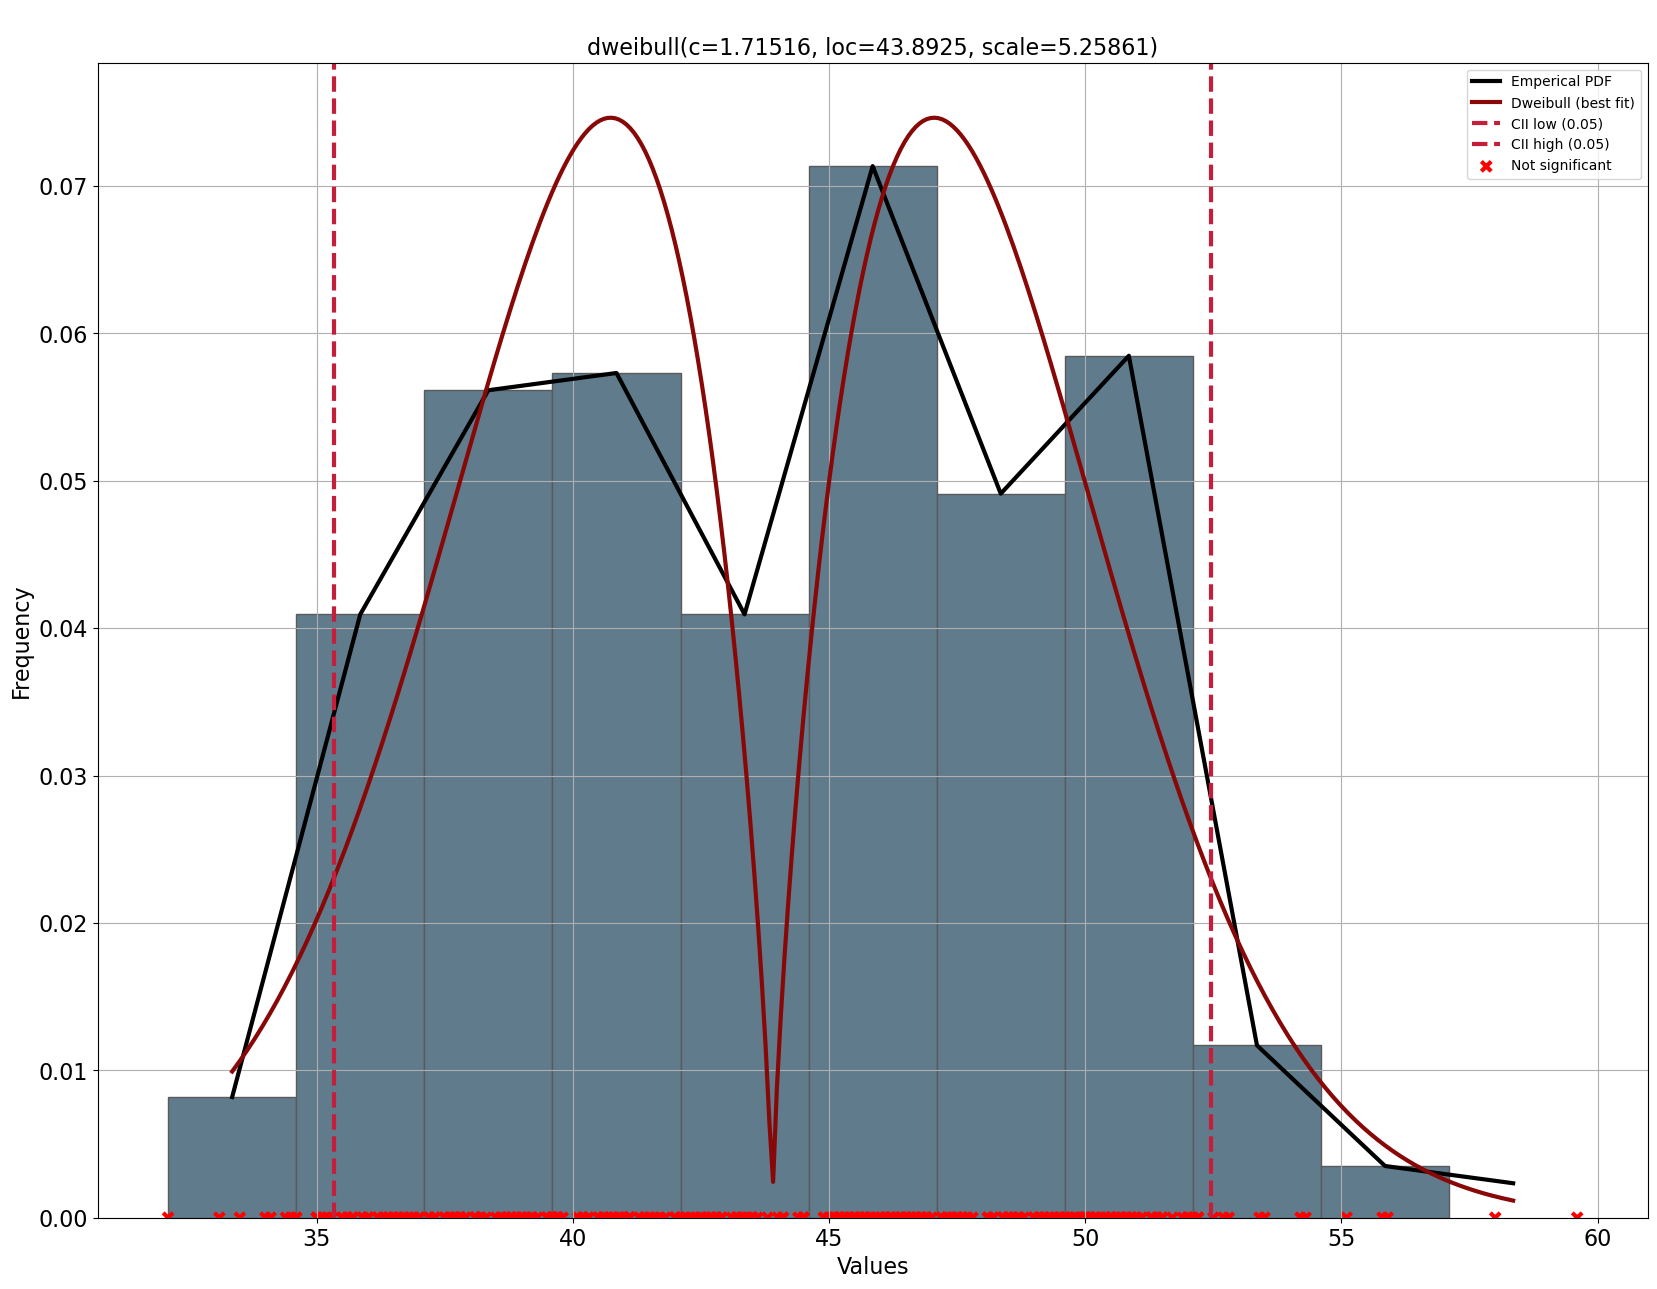

In [27]:
dist = distfit() # Initialize distfit

dist.fit_transform(df['bill_length_mm'].dropna().values) # Fit distributions on empirical data bill_length_mm, after dropping missing values
dist.predict(df['bill_length_mm'].dropna().values) # Predict the probability of the response variables
dist.plot() # Plot the best fitted distribution (y is included if prediction is made)

The distribution with the lowest RSS is selected (the Weibull distribution) for bill_length_mm variable.

##### FOR COLUMN bill_depth_mm:

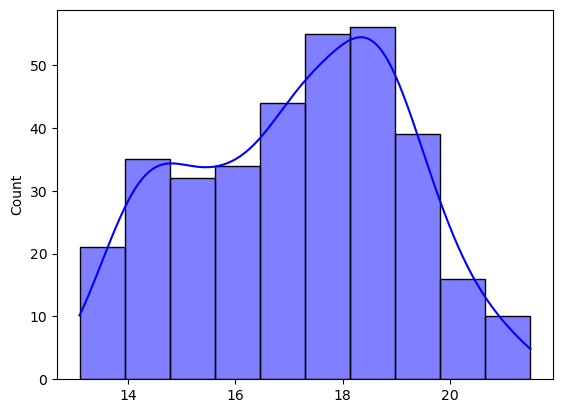

In [16]:
# df['bill_depth_mm'].hist()

# OR

bill_depth_mm_array = df['bill_depth_mm'].values
# print(bill_depth_mm_array)

# Create a histogram and plot the fitted normal distribution
sns.histplot(bill_depth_mm_array, kde=True, color='blue', label='Data')
plt.show()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0113275] [loc=17.151 scale=1.972]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0671717] [loc=13.100 scale=4.051]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0671717] [loc=-268435442.900 scale=268435456.000]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 0.0118817] [loc=17.378 scale=1.821]
[distfit] >INFO> [t         ] [0.23 sec] [RSS: 0.0113282] [loc=17.151 scale=1.972]
[distfit] >INFO> [genextreme] [0.04 sec] [RSS: 0.00785858] [loc=16.534 scale=2.033]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.0122692] [loc=-25.596 scale=0.092]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.0113277] [loc=-262130.900 scale=262148.051]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 0.00764686] [loc=12.991 scale=8.609]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0257313] [loc=13.100 scale=8.400]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 0.00911229] [loc=-2.588 scale=7.445]


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=1.78879, b=1.94301, loc=12.9906, scale=8.60919)'}, xlabel='Values', ylabel='Frequency'>)

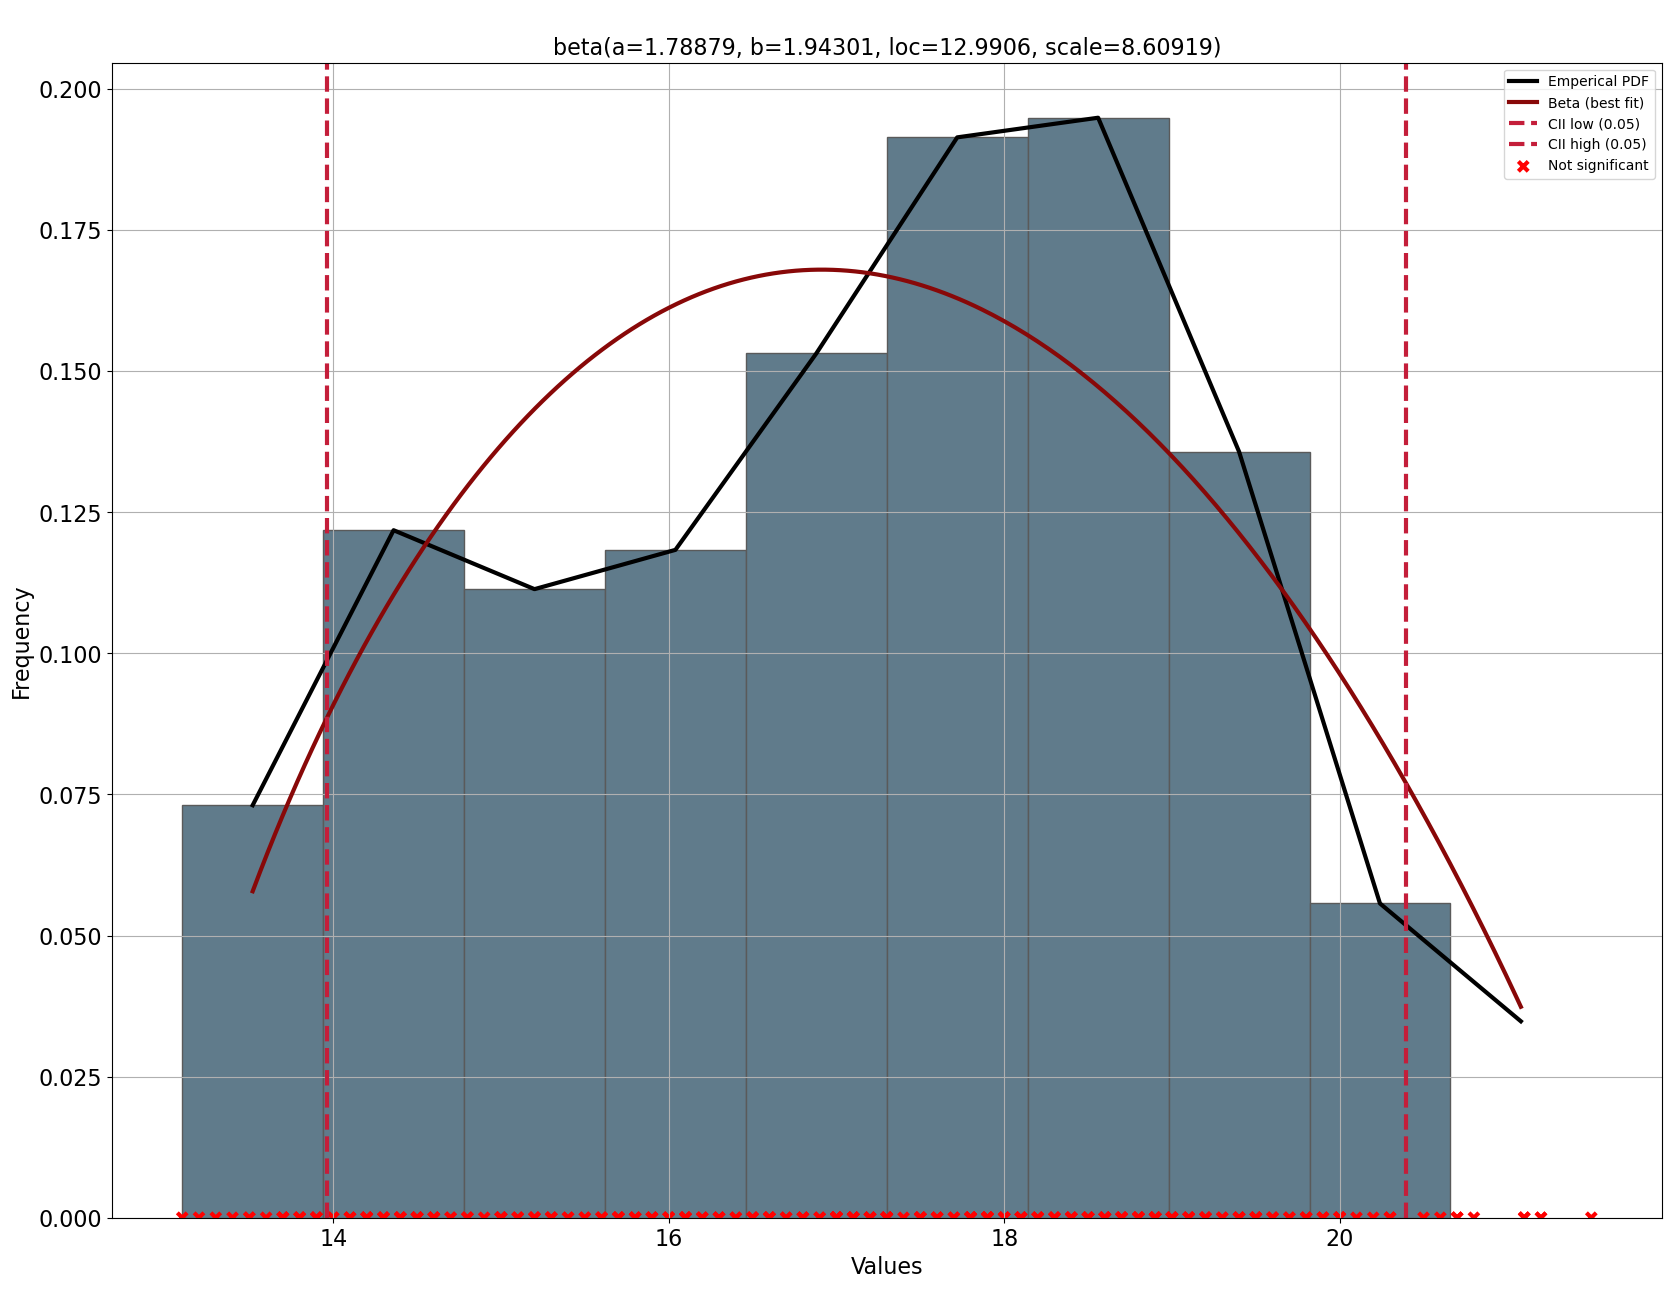

In [31]:
dist = distfit() # Initialize distfit

dist.fit_transform(df['bill_depth_mm'].dropna().values)   # Fit distributions on empirical data bill_depth_mm
dist.predict(df['bill_depth_mm'].dropna().values)         # Predict the probability of the response variables
dist.plot() # Plot the best fitted distribution (y is included if prediction is made)

The distribution with the lowest RSS is selected (the Beta distribution) for bill_depth_mm variable.

##### FOR COLUMN flipper_length_mm:

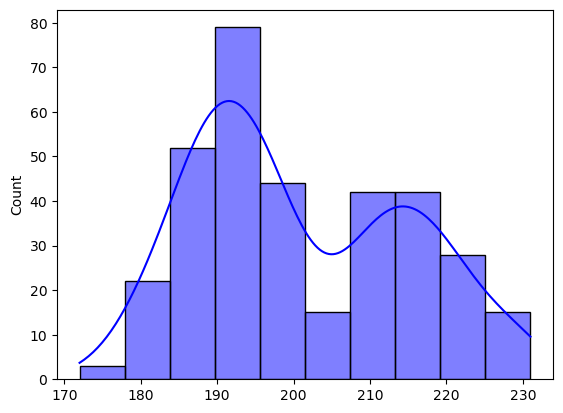

In [28]:
#df['flipper_length_mm'].hist() 

# OR

flipper_length_mm_array = df['flipper_length_mm'].values
# print(flipper_length_mm_array)

# Create a histogram and plot the fitted normal distribution
sns.histplot(flipper_length_mm_array, kde=True, color='blue', label='Data')
plt.show()

# Output: looks like a bimodal distribution

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000826991] [loc=200.915 scale=14.041]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0020735] [loc=172.000 scale=28.915]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0020735] [loc=-4294967124.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.000255796] [loc=203.957 scale=14.441]
[distfit] >INFO> [t         ] [0.21 sec] [RSS: 0.000826915] [loc=200.915 scale=14.042]
[distfit] >INFO> [genextreme] [0.09 sec] [RSS: 0.000642431] [loc=195.001 scale=12.382]
[distfit] >INFO> [gamma     ] [0.02 sec] [RSS: 0.000558344] [loc=166.110 scale=5.980]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.000580602] [loc=150.667 scale=48.301]
[distfit] >INFO> [beta      ] [0.04 sec] [RSS: 0.000611472] [loc=171.521 scale=63.707]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0010904] [loc=172.000 scale=59.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.000834012] [loc=-2839.34

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ndweibull(c=2.05434, loc=203.957, scale=14.4412)'}, xlabel='Values', ylabel='Frequency'>)

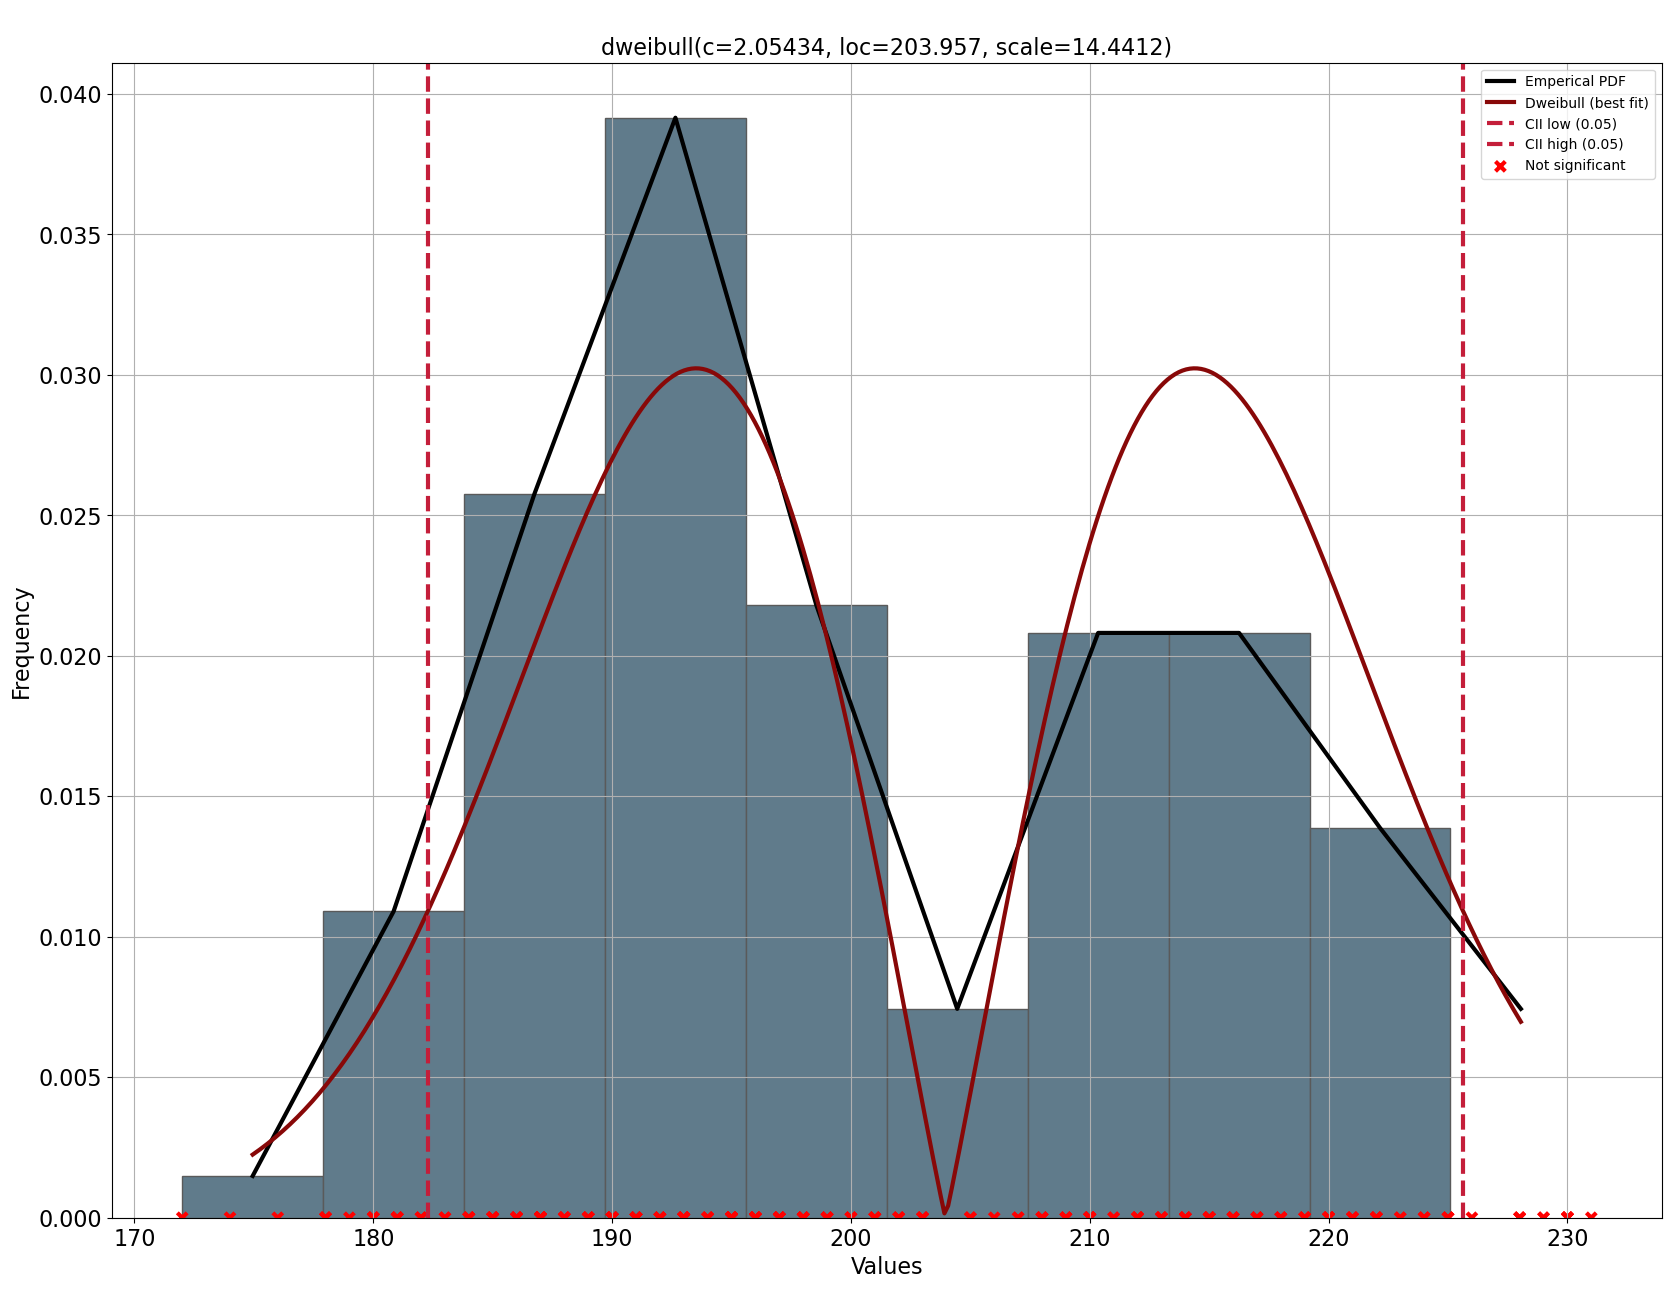

In [29]:
dist = distfit()

dist.fit_transform(df['flipper_length_mm'].dropna().values)   # Fit distributions on empirical data flipper_length_mm after dropping missing values
dist.predict(df['flipper_length_mm'].dropna().values)         # Predict the probability of the response variables
dist.plot() # Plot the best fitted distribution (y is included if prediction is made)

The distribution with the lowest RSS is selected (the Weibull distribution) for flipper_length_mm variable.

##### FOR COLUMN body_mass_g:

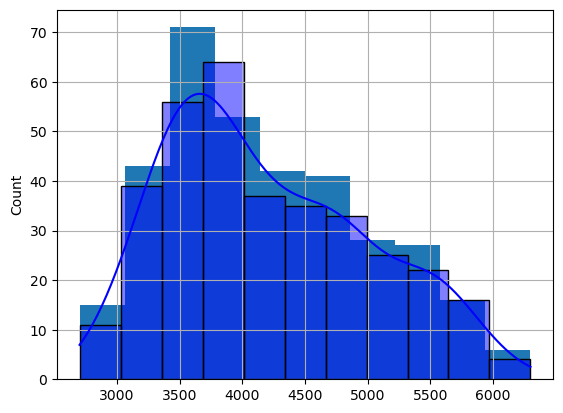

In [19]:
df['body_mass_g'].hist() 

# poisson distribution, but left-skewed/negatively skewed
# could be Negative Skew normal distribution, Gamma distribution or log-normal distribution
# 
# # OR

body_mass_g_array = df['body_mass_g'].values
# print(body_mass_g_array)

# Create a histogram and plot the fitted normal distribution
sns.histplot(body_mass_g_array, kde=True, color='blue', label='Data')
plt.show()

# Output: looks like a skewed distribution

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1.20405e-07] [loc=4201.754 scale=800.781]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 4.06033e-07] [loc=2700.000 scale=1501.754]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 4.06033e-07] [loc=-274877904244.000 scale=274877906944.000]
[distfit] >INFO> [dweibull  ] [0.06 sec] [RSS: 1.02503e-07] [loc=4224.060 scale=751.625]
[distfit] >INFO> [t         ] [0.21 sec] [RSS: 1.20401e-07] [loc=4201.832 scale=800.865]
[distfit] >INFO> [genextreme] [0.09 sec] [RSS: 9.60938e-07] [loc=2700.418 scale=2.428]
[distfit] >INFO> [gamma     ] [0.02 sec] [RSS: 4.17172e-08] [loc=2487.054 scale=399.816]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 4.93168e-08] [loc=1761.401 scale=2311.250]
[distfit] >INFO> [beta      ] [0.04 sec] [RSS: 4.86231e-08] [loc=2676.608 scale=3974.324]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 2.63808e-07] [loc=2700.000 scale=3600.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ngamma(a=4.28872, loc=2487.05, scale=399.816)'}, xlabel='Values', ylabel='Frequency'>)

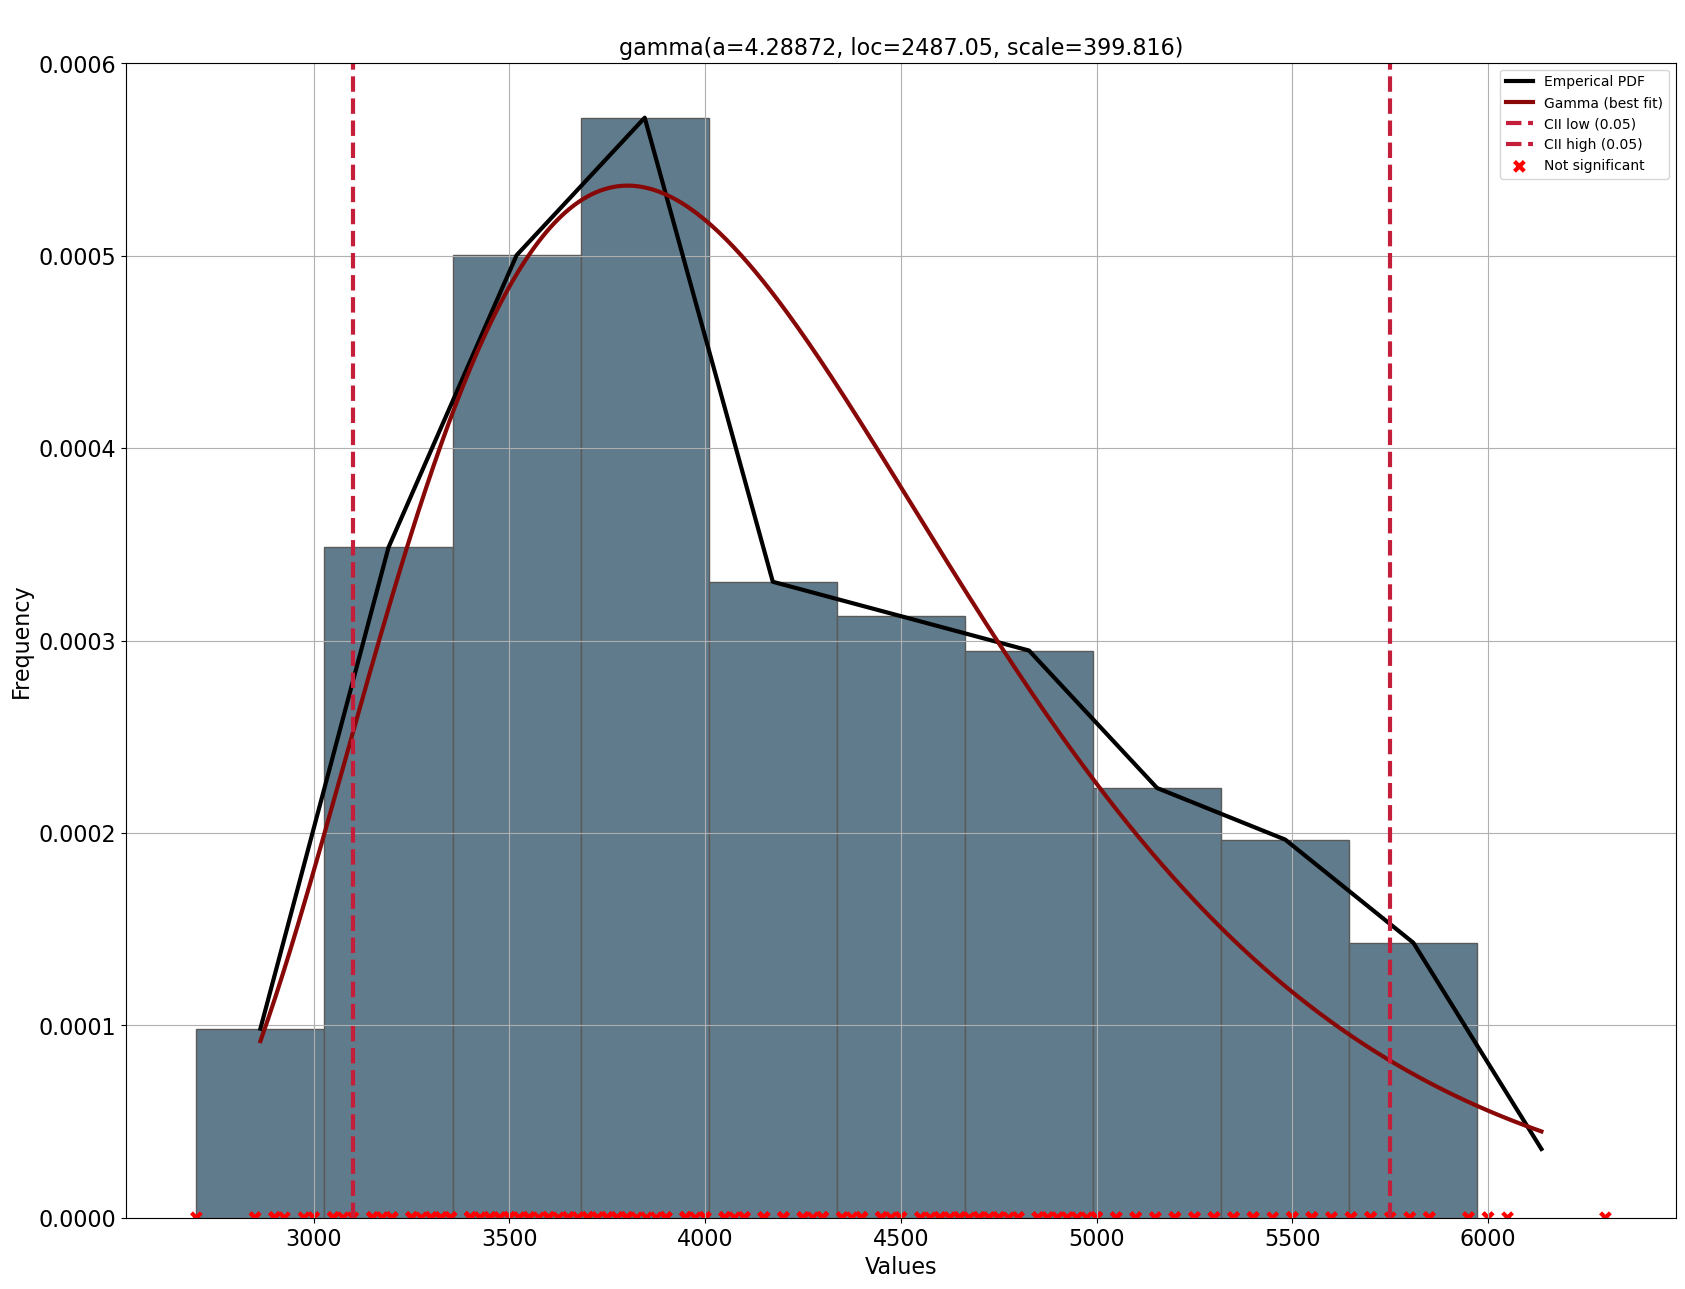

In [30]:
dist = distfit()

dist.fit_transform(df['body_mass_g'].dropna().values)   # Fit distributions on empirical data body_mass_g
dist.predict(df['body_mass_g'].dropna().values)         # Predict the probability of the response variables
dist.plot() # Plot the best fitted distribution (y is included if prediction is made)

The distribution with the lowest RSS is selected (the Gamma distribution) for body_mass_g variable.

## **Task 4 : Head Probability** 
> Suppose you are flipping two coins, each with a probability p of giving heads.

### Task Description:
> The task is to plot the entropy of the total number of heads versus p.

In [37]:
import numpy as np # for numerical arrats and random numbers
import matplotlib.pyplot as plt  # for plots
from scipy.stats import entropy

In [7]:
# USE RANDOM BINOMIAL (n, p, size=None), because you can only get head or tail

two_rand_coins = np.random.binomial(2, 0.5, 1000) # flip 2 fair coins, probability of getting heads is 0.5, flip 100 times
two_rand_coins # show array

array([2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1,
       2, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0,
       1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2,
       1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1,

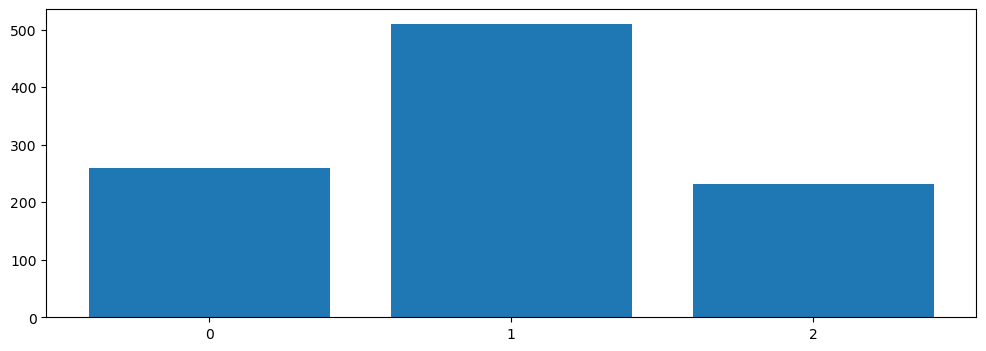

In [8]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 4))

# Count the unqiue values in the array.
x, counts = np.unique(two_rand_coins, return_counts=True)

# Create a bar chart of rand_coins.
ax.bar(x, counts)

# Make the x axis look sensible.
ax.set_xticks(x);

# Output will show MORE the chance of getting 1 head than 0 heads or 2 heads at 100 flips.
# It will even out if we increase number of flips

In [41]:
# Function to calculate entropy
def calculate_entropy(p):
    t = 1 - p  # probability of getting tails
    probabilities = [p**2, 2 * p * t, t**2]  # Probabilities of 0, 1, and 2 heads
    return entropy(probabilities, base=2) # base 2 because it's either head or tail


In [38]:
# Generate values for p
total_heads = np.linspace(0, 1, 500)

total_heads

array([0.        , 0.00200401, 0.00400802, 0.00601202, 0.00801603,
       0.01002004, 0.01202405, 0.01402806, 0.01603206, 0.01803607,
       0.02004008, 0.02204409, 0.0240481 , 0.0260521 , 0.02805611,
       0.03006012, 0.03206413, 0.03406814, 0.03607214, 0.03807615,
       0.04008016, 0.04208417, 0.04408818, 0.04609218, 0.04809619,
       0.0501002 , 0.05210421, 0.05410822, 0.05611222, 0.05811623,
       0.06012024, 0.06212425, 0.06412826, 0.06613226, 0.06813627,
       0.07014028, 0.07214429, 0.0741483 , 0.0761523 , 0.07815631,
       0.08016032, 0.08216433, 0.08416834, 0.08617234, 0.08817635,
       0.09018036, 0.09218437, 0.09418838, 0.09619238, 0.09819639,
       0.1002004 , 0.10220441, 0.10420842, 0.10621242, 0.10821643,
       0.11022044, 0.11222445, 0.11422846, 0.11623246, 0.11823647,
       0.12024048, 0.12224449, 0.1242485 , 0.12625251, 0.12825651,
       0.13026052, 0.13226453, 0.13426854, 0.13627255, 0.13827655,
       0.14028056, 0.14228457, 0.14428858, 0.14629259, 0.14829

In [39]:
# Calculate entropy for each value of p
entropy_values = [calculate_entropy(h) for h in total_heads]

entropy_values

[0.0,
 0.03769999399360621,
 0.0673884089735507,
 0.09405565243039565,
 0.11876247247654662,
 0.14201264122816123,
 0.16410286418129394,
 0.18522918627162052,
 0.20553093766655212,
 0.22511228933206898,
 0.24405409316384885,
 0.2624209342586537,
 0.28026559629197245,
 0.2976320277745839,
 0.3145573901583213,
 0.331073517803081,
 0.34720798692472454,
 0.3629849162959079,
 0.3784255789223872,
 0.39354887739304034,
 0.40837171889510315,
 0.4229093150509473,
 0.43717542452265723,
 0.451182551422371,
 0.46494210915640233,
 0.47846455691851736,
 0.49175951431233805,
 0.5048358583157421,
 0.5177018058622377,
 0.5303649846113287,
 0.5428324939469127,
 0.5551109578343623,
 0.5672065708508928,
 0.5791251384570274,
 0.5908721123825909,
 0.6024526218463526,
 0.6138715012050414,
 0.6251333145280608,
 0.6362423775136763,
 0.6472027770967433,
 0.658018389044136,
 0.6686928937895837,
 0.6792297907227566,
 0.6896324111167289,
 0.6999039298522378,
 0.7100473760755398,
 0.7200656429084159,
 0.72996149631

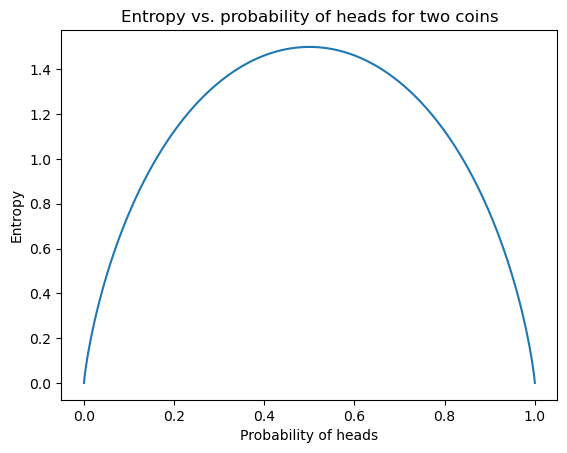

In [42]:
# Plot the entropy
plt.plot(total_heads, entropy_values, label='Entropy')
plt.title('Entropy vs. probability of heads for two coins')
plt.xlabel('Probability of heads')
plt.ylabel('Entropy')
plt.show()

## **Task 5 : Penguins Data Set Plots** 
> Penguins data set.

### Task Description:
> The task is to create an appropriate individual plot for each of the variables in the penguin data set.

***

## End